# Random Forest Project - Solutions

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [6]:
loan = pd.read_csv("loan_data.csv")

** Check out the info(), head(), and describe() methods on loans.**

In [7]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Using countplot , find how many loans not fully paid per purpose

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

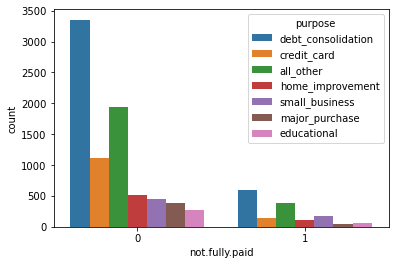

In [9]:
sb.countplot(data=loan,x='not.fully.paid',hue='purpose')

In [13]:
loan.groupby('purpose')['not.fully.paid'].mean().sort_values(ascending=False)

purpose
small_business        0.277868
educational           0.201166
home_improvement      0.170111
all_other             0.166023
debt_consolidation    0.152388
credit_card           0.115689
major_purchase        0.112128
Name: not.fully.paid, dtype: float64

Use pairplot graph, use some combinations of columns 

In [10]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

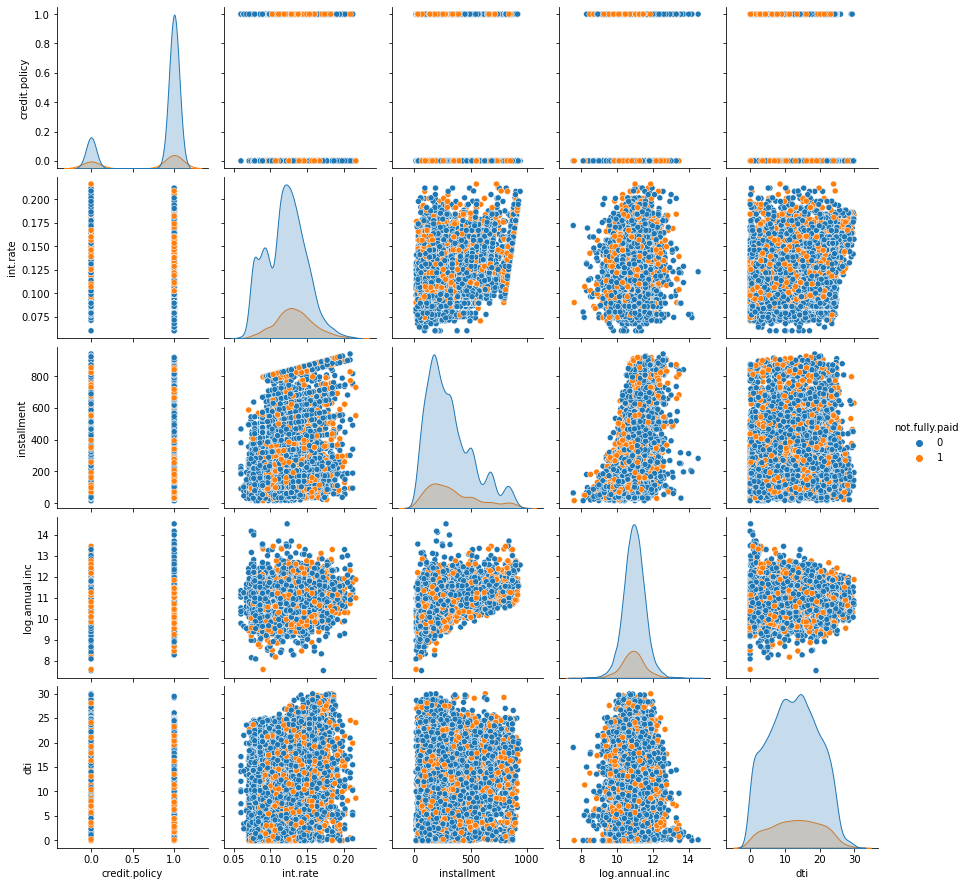

In [17]:
sb.pairplot(pd.concat([loan.iloc[:,:6],loan['not.fully.paid']],axis=1),hue='not.fully.paid')

Create a dummy variable from the purpose field

In [20]:
final_data = pd.get_dummies(loan,columns=['purpose'],drop_first=True)

In [21]:
final_data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = final_data.drop('not.fully.paid',axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [29]:
pred = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.20      0.20      0.20       511

    accuracy                           0.74      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.74      0.74      0.74      3161



In [33]:
print(confusion_matrix(y_test,pred))

[[2235  415]
 [ 407  104]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [39]:
pred = rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.33      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161



**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

**Show the Confusion Matrix for the predictions.**

In [40]:
print(confusion_matrix(y_test,pred))

[[2634   16]
 [ 503    8]]


In [41]:
rfc.predict_proba(X_test)

array([[0.77, 0.23],
       [0.86, 0.14],
       [0.93, 0.07],
       ...,
       [0.98, 0.02],
       [0.87, 0.13],
       [0.75, 0.25]])

In [42]:
rfc.predict_proba(X_test).argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
rfc.predict_proba(X_test).argmax(axis=1).sum()

24

In [46]:
#threshhold to 0.3
print(rfc.predict_proba(X_test)[:,1] > 0.3)
print((rfc.predict_proba(X_test)[:,1] > 0.3).sum())

[False False False ... False False False]
387


In [47]:
pred = rfc.predict_proba(X_test)[:,1] > 0.3
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2650
           1       0.32      0.24      0.27       511

    accuracy                           0.79      3161
   macro avg       0.59      0.57      0.58      3161
weighted avg       0.77      0.79      0.78      3161



In [48]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [49]:
recall_score(y_test,pred)

0.24070450097847357

In [50]:
r = []
for i in range(0,101):
    pred = ( rfc.predict_proba(X_test)[:,1] > i/100)
    r.append(recall_score(y_test,pred))
    

In [51]:
r

[1.0,
 0.9980430528375733,
 0.9941291585127201,
 0.9804305283757339,
 0.9667318982387475,
 0.9432485322896281,
 0.9217221135029354,
 0.9099804305283757,
 0.8825831702544031,
 0.8688845401174168,
 0.8414872798434442,
 0.8003913894324853,
 0.7671232876712328,
 0.7240704500978473,
 0.684931506849315,
 0.6614481409001957,
 0.639921722113503,
 0.6027397260273972,
 0.5675146771037182,
 0.5440313111545988,
 0.5264187866927593,
 0.48140900195694714,
 0.44031311154598823,
 0.4070450097847358,
 0.37573385518590996,
 0.34833659491193736,
 0.3287671232876712,
 0.30528375733855184,
 0.2876712328767123,
 0.26418786692759294,
 0.24070450097847357,
 0.2191780821917808,
 0.21135029354207435,
 0.18199608610567514,
 0.15655577299412915,
 0.14090019569471623,
 0.1350293542074364,
 0.12524461839530332,
 0.11154598825831702,
 0.09393346379647749,
 0.08023483365949119,
 0.06457925636007827,
 0.05870841487279843,
 0.04892367906066536,
 0.03913894324853229,
 0.03131115459882583,
 0.023483365949119372,
 0.01956

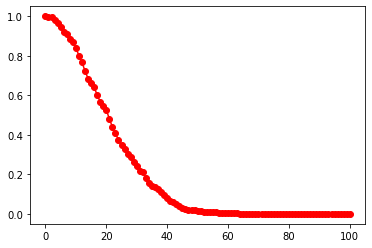

In [52]:
plt.plot(range(0,101),r,'-or')

In [53]:
conda install plotly

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.18  |       haa95532_0         122 KB
    importlib-metadata-2.0.0   |             py_1          35 KB
    ipywidgets-7.6.5           |     pyhd3eb1b0_1         105 KB
    jinja2-3.0.3               |     pyhd3eb1b0_0         106 KB
    libwebp-1.2.2              |       h2bbff1b_0         658 KB
    openssl-1.1.1n             |       h2bbff1b_0         4.8 MB
    patsy-0.5.2                |   py38haa95532_1         272 KB
    pillow-9.0.1               |   py38hdc2b20a_0         923 KB
    pytest-6.2.5               |   py38haa95532_2         454 KB
    --------------------------------------------------


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::alabaster==0.7.12=py_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda==custom=py38_1
  - defaults/win-64::anaconda-navigator==2.1.1=py38_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/noarch::anyqt==0.0.13=pyhd3eb1b0_0
  - defaults/win-64::argh==0.26.2=py38_0
  - defaults/win-64::argon2-cffi==20.1.0=py38he774522_1
  - defaults/noarch::asn1crypto==1.4.0=py_0
  - defaults/win-64::astroid==2.4.2=py38_0
  - defaults/win-64::astropy==4.0.2=py38he774522_0
  - defaults/noarch::async_generator==1.10=py_0
  - defaults/noarch::atomicwrites==1.4.0=py_0
  - defaults/noarch::attrs==20.3.0=pyhd3eb1b0_0
  - defaults/noarch::autopep8==1.5.4=py_0
  - defaults/noarch::babel==2.8.1=pyhd3eb1b0_0
  - defaults/noarch::backcall==0.2.0=py_0
  - defaults/noarch::backports==1.0=py_2
  - defaults/noarch::backports

In [55]:
import plotly.express as px
fig = px.scatter(x=range(0,101),y=1)
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'y' is of type str or int.

In [56]:
from sklearn.metrics import precision_recall_curve

Text(0, 0.5, 'precision')

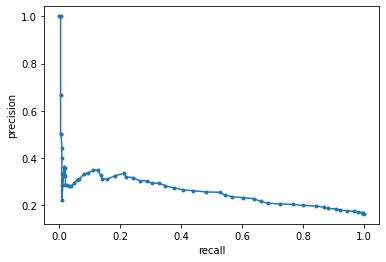

In [62]:
y_prob = rfc.predict_proba(X_test)
y_prob = y_prob[:,1]
precision, recall, thresholds = precision_recall_curve(y_test,y_prob)
plt.plot(recall, precision, marker = '.')
plt.xlabel('recall')
plt.ylabel('precision')